## Predicting Presidential Approval based on socioeconomic factors

### March 28, 2021

#### Lance N Snodderly

### 1. Introduction
The premise of this exercise is to see if there are any socioeconomic factors that are indicative of presidential approval. Rather, if someone's particular approval might be related to factors such as income or location (rural vs. urban). I will be using pew research data for this study since Pew studies provide high quality data for study

### 2. Data Cleaning
For data cleaning I reviewed the data set for variables of interest and trimmed out the variables were not of interest. Once I had cleaned my data of variables I am not interested in, I then converted the variables of interest into a form where I could put them into a historgram and run a kmeans clustering on the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

#To grab dataset and convert to pandas dataframe
table_M = pd.read_spss ("C:\\Users\\lance\\ATP_W65.sav")

In [2]:
table_M

,QKEY,INTERVIEW_START_W65,INTERVIEW_END_W65,DEVICE_TYPE_W65,LANG_W65,FORM_W65,SATIS_W65,POL1DT_W65,POL1DTSTR_W65,PELOSIAPP_W65,...,F_HISP_ORIGIN,F_YEARSINUS,F_USR_SELFID,F_E3,F_INC_TIER2,DEM1_CODE_FINAL_W59,COUNTY3_W65,BATTLE_NARROW_W65,WEIGHT_W65,WEIGHT_W65_W59
0,1.001970e+05,2020-04-09 03:52:30,2020-04-09 04:18:54,Tablet,English,1.0,Dissatisfied,Disapprove,Very strongly,Approve,...,Non-Hispanic,Non-Hispanic,Urban,Not employed,Middle income,Tom Steyer,"Low [0,5]",lean/likely D,0.319709,0.307850
1,1.002600e+05,2020-04-09 23:21:20,2020-04-09 23:36:24,Tablet,English,2.0,Satisfied,Approve,Very strongly,Disapprove,...,Non-Hispanic,Non-Hispanic,Suburban,Part-time,Middle income,NaN,"High [25,10,000]",Solid D,0.650016,0.664152
2,1.003140e+05,2020-04-09 17:25:33,2020-04-09 17:41:38,Smartphone,English,2.0,Satisfied,Approve,Very strongly,Disapprove,...,Non-Hispanic,Non-Hispanic,Rural,Part-time,Middle income,NaN,"Low [0,5]",battleground,0.375057,0.381497
3,1.003630e+05,2020-04-09 13:20:06,2020-04-09 13:29:28,Smartphone,English,1.0,Dissatisfied,Approve,Not so strongly,Disapprove,...,Non-Hispanic,Non-Hispanic,Suburban,Part-time,Upper income,NA,"Low [0,5]",Solid D,0.387643,0.390130
4,1.014370e+05,2020-04-09 02:10:21,2020-04-09 02:24:43,Laptop/PC,English,1.0,Satisfied,Approve,Very strongly,Disapprove,...,Non-Hispanic,Non-Hispanic,Rural,Not employed,Lower income,NaN,"Low [0,5]",Solid R,0.695579,0.698472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,2.019011e+11,2020-04-09 06:34:50,2020-04-09 15:45:45,Tablet,English,1.0,Dissatisfied,Refused,NaN,Approve,...,Non-Hispanic,Non-Hispanic,Urban,Not employed,Lower income,Joe Biden,"High [25,10,000]",Solid R,1.155377,1.316500
4913,2.019011e+11,2020-04-09 21:28:23,2020-04-09 21:41:46,Smartphone,English,1.0,Dissatisfied,Approve,Very strongly,Disapprove,...,Non-Hispanic,Non-Hispanic,Rural,Part-time,Lower income,NaN,"Low [0,5]",lean/likely R,2.107235,NaN
4914,2.019011e+11,2020-04-09 23:19:46,2020-04-09 23:52:44,Tablet,English,1.0,Dissatisfied,Disapprove,Very strongly,Disapprove,...,Non-Hispanic,Non-Hispanic,Suburban,Not employed,Lower income,NA,"Med [5,25]",Solid R,1.113684,1.289428
4915,2.019011e+11,2020-04-09 16:13:59,2020-04-09 16:41:59,Smartphone,English,2.0,Dissatisfied,Disapprove,Not so strongly,Approve,...,Non-Hispanic,Non-Hispanic,Urban,Not employed,Lower income,Joe Biden,"Low [0,5]",Solid D,2.413746,2.532453


In [3]:
df = table_M

In [4]:
df.shape

(4917, 138)

In [5]:
#To see all columns and explore data for variables of interest
pd.set_option('display.max_columns', None)
df.head()

,QKEY,INTERVIEW_START_W65,INTERVIEW_END_W65,DEVICE_TYPE_W65,LANG_W65,FORM_W65,SATIS_W65,POL1DT_W65,POL1DTSTR_W65,PELOSIAPP_W65,MCCONNELLAPP_W65,DIVISIONSRD_W65,GOVFEEL_W65,TRUSTFEDGOV_W65,THERMTRUMP_W65,THERMPENCE_W65,THERMBIDEN_W65,THERMSANDER_W65,PRZCMPGN_W65,MATTERS_W65,VOTEGENA_W65,VOTEGENB_W65,BIDEUNITE_W65,DISSCANDS_W65,VTPRIORITY_a_W65,VTPRIORITY_b_W65,VTPRIORITY_c_W65,VTPRIORITY_d_W65,ELECT_CONF_a_W65,ELECT_CONF_b_W65,CONCEDE_W65,ECON1_W65,ECON1B_W65,PERSFNC_W65,PERSFNCB_W65,DTCOV_EGFP_a_W65,DTCOV_EGFP_b_W65,DTCOV_EGFP_c_W65,DTCOV_EGFP_d_W65,DTCOV_EGFP_e_W65,COVID_TRUMPCRIT_W65,DTCOV_TONE_W65,COVID_DTSPEED_W65,COVID_LAST_W65,COVID_FUT_W65,COVID_ASSIST_W65,COVID_2BILL_W65,E_COVID_W65,COVIDWORK_a_W65,COVIDWORK_b_W65,COVID_INDVD_W65,COVID_AIDGOV_a_W65,COVID_AIDGOV_b_W65,COVID_AIDGOV_c_W65,COVID_AIDGOV_d_W65,COVID_AIDGOV_e_W65,COVID_AIDGOV_f_W65,COVID_ECONOPEN_W65,COVID_AIDPERS_W65,COVID_ELCT_W65,COVID_INFECT_a_W65,COVID_INFECT_b_W65,COVID_VENTILATOR_W65,WORRY2_a_W65,WORRY2_b_W65,WORRY2_c_W65,WORRY2_d_W65,WORRY2_e_W65,WORRY2_f_W65,BILLSTYPICAL_W65,BILLSNOW_W65,EMERGFUND_W65,EMERGCOVER_W65,COVIDSCHL1_W65,PARENTK12_W65,COVIDSCHL2_W65,COVIDSCHL3_W65,COVIDSCHL4_W65,COVIDSCHL5_W65,COVIDSCHL6_W65,COVIDSCHL7_a_W65,COVIDSCHL7_b_W65,COVIDSCHL7_c_W65,COVWEBSOC_a_W65,COVWEBSOC_b_W65,COVINTESS_W65,BBHOME1_W65,SMARTPHONE_W65,COVDIGGOV_a_W65,COVDIGGOV_b_W65,COVPAYTECH_a_W65,COVPAYTECH_b_W65,COVTRACK1_W65,COVTRACK2_a_W65,COVTRACK2_b_W65,COVTRACK2_c_W65,COVTECHACT_a_W65,COVTECHACT_b_W65,COVTECHACT_c_W65,COVTECHACT_d_W65,COVTECHACT_e_W65,COVTECHACT_f_W65,COVID_KNOWPATIENT_W65,F_METRO,F_CREGION,F_CDIVISION,F_AGECAT,F_SEX,F_EDUCCAT,F_EDUCCAT2,F_HISP,F_RACECMB,F_RACETHN,F_CITIZEN,F_NATIVITY2,F_MARITAL,F_RELIG,F_BORN,F_ATTEND,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,F_HISP_ORIGIN,F_YEARSINUS,F_USR_SELFID,F_E3,F_INC_TIER2,DEM1_CODE_FINAL_W59,COUNTY3_W65,BATTLE_NARROW_W65,WEIGHT_W65,WEIGHT_W65_W59
0,100197.0,2020-04-09 03:52:30,2020-04-09 04:18:54,Tablet,English,1.0,Dissatisfied,Disapprove,Very strongly,Approve,Disapprove,Increasing,Angry,Only some of the time,0,50,60,50,A lot,1 Really matters who wins,Refused,Lean more toward Joe Biden,Differences and disagreements will keep many D...,Bothers you,Strongly favor,Somewhat favor,NaN,NaN,Not at all confident,Not at all confident,Very important,Poor,About the same as now,Only fair shape,About the same as now,Only fair,Only fair,Only fair,Only fair,Poor,Acceptable,Refused,NaN,A year or more,NaN,Right thing,"Yes, another bill will be necessary",Not employed (including retired or in school),"No, has not happened","Yes, has happened",Impacted my finances about the same as it has ...,Not too much,Not too much,NaN,NaN,Not too much,Not too much,Lift the restrictions too quickly,Save it,Not too likely,Not too concerned,Not too concerned,"Patients who are most in need at the moment, w...",Sometimes,NaN,Sometimes,Sometimes,Almost every day,NaN,I can typically pay all of my bills in full,I will be able to pay all of my bills in full,Yes,NaN,"Yes, schools have this responsibility to all s...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good thing,Good thing,"Important, but not essential",Higher-speed broadband service,"No, I do not have a smartphone","No, the federal government does not have this ...","No, the federal government does not have this ...",Not too much,NaN,Help a little in limiting the spread of the virus,Somewhat acceptable,Somewhat acceptable,Somewhat acceptable,"No, I have not done this","No, I have not done this","Yes, I have done this","No, I have not done this","No, I have not done this","No, I have not done this",No,Metropolitan,Midwest,West North Central,65+,Female,Some College,"Some college, no degree",No,White,White non-Hispanic,Yes,U.S.,Divorced,Roman Catholic,No,More than once a week,Democrat,NaN,Dem/Lean Dem,"$20,000 to less than $30,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Accesses internet by payin

In [36]:
#To grab variables of interest in a new dataframe
df2 = df[['SATIS_W65', 'VOTEGENA_W65', 'POL1DT_W65', 'POL1DTSTR_W65','F_INC_TIER2','F_E3', 'F_USR_SELFID', 'BATTLE_NARROW_W65','COVID_INDVD_W65','WORRY2_a_W65','WORRY2_b_W65','WORRY2_c_W65','WORRY2_d_W65','WORRY2_f_W65']]

In [37]:
df2.head()

,SATIS_W65,VOTEGENA_W65,POL1DT_W65,POL1DTSTR_W65,F_INC_TIER2,F_E3,F_USR_SELFID,BATTLE_NARROW_W65,COVID_INDVD_W65,WORRY2_a_W65,WORRY2_b_W65,WORRY2_c_W65,WORRY2_d_W65,WORRY2_f_W65
0,Dissatisfied,Refused,Disapprove,Very strongly,Middle income,Not employed,Urban,lean/likely D,Impacted my finances about the same as it has ...,Sometimes,NaN,Sometimes,Sometimes,NaN
1,Satisfied,"Donald Trump, the Republican",Approve,Very strongly,Middle income,Part-time,Suburban,Solid D,Hurt my finances LESS than those of most other...,Rarely,Rarely,Rarely,Rarely,Rarely
2,Satisfied,"Donald Trump, the Republican",Approve,Very strongly,Middle income,Part-time,Rural,battleground,Impacted my finances about the same as it has ...,Sometimes,NaN,Sometimes,Sometimes,NaN
3,Dissatisfied,"Joe Biden, the Democrat",Approve,Not so strongly,Upper income,Part-time,Suburban,Solid D,Hurt my finances LESS than those of most other...,Sometimes,NaN,Sometimes,Almost every day,NaN
4,Satisfied,"Donald Trump, the Republican",Approve,Very strongly,Lower income,Not employed,Rural,Solid R,Impacted my finances about the same as it has ...,Never,NaN,Never,Never,NaN


In [38]:
# To relabel columns

df3 = df2.rename(columns={'SATIS_W65' : 'Satisfied With Country', 'VOTEGENA_W65' : 'Vote in election', 'POL1DT_W65' : 'Donald Trump Approval', 'POL1DTSTR_W65' :'Strength of Approval/Disapproval' ,'F_INC_TIER2' : 'Income Tier', 'F_E3' : 'Employment' , 'F_USR_SELFID' : 'Community type', 'BATTLE_NARROW_W65' : 'Political Area', 'COVID_INDVD_W65' : 'COVID impact on finances','WORRY2_a_W65' : 'Worried about Debt','WORRY2_b_W65' : 'Worried about losing Job','WORRY2_c_W65' : 'Worried about Paying Bills','WORRY2_d_W65' : 'Worried about Healthcare Costs','WORRY2_f_W65' : 'Worried about Cut in Pay'})
df3.head()

,Satisfied With Country,Vote in election,Donald Trump Approval,Strength of Approval/Disapproval,Income Tier,Employment,Community type,Political Area,COVID impact on finances,Worried about Debt,Worried about losing Job,Worried about Paying Bills,Worried about Healthcare Costs,Worried about Cut in Pay
0,Dissatisfied,Refused,Disapprove,Very strongly,Middle income,Not employed,Urban,lean/likely D,Impacted my finances about the same as it has ...,Sometimes,NaN,Sometimes,Sometimes,NaN
1,Satisfied,"Donald Trump, the Republican",Approve,Very strongly,Middle income,Part-time,Suburban,Solid D,Hurt my finances LESS than those of most other...,Rarely,Rarely,Rarely,Rarely,Rarely
2,Satisfied,"Donald Trump, the Republican",Approve,Very strongly,Middle income,Part-time,Rural,battleground,Impacted my finances about the same as it has ...,Sometimes,NaN,Sometimes,Sometimes,NaN
3,Dissatisfied,"Joe Biden, the Democrat",Approve,Not so strongly,Upper income,Part-time,Suburban,Solid D,Hurt my finances LESS than those of most other...,Sometimes,NaN,Sometimes,Almost every day,NaN
4,Satisfied,"Donald Trump, the Republican",Approve,Very strongly,Lower income,Not employed,Rural,Solid R,Impacted my finances about the same as it has ...,Never,NaN,Never,Never,NaN


### This is to take a look at the data and see if there are any clusters that show a relationship between Presidential approval and income bracket

Below I am converting Donald Trump Approval and Approval strength into dummy variables then combining them together by multiplying them together.

In [39]:
df3.dtypes

Satisfied With Country              category
Vote in election                    category
Donald Trump Approval               category
Strength of Approval/Disapproval    category
Income Tier                         category
Employment                          category
Community type                      category
Political Area                      category
COVID impact on finances            category
Worried about Debt                  category
Worried about losing Job            category
Worried about Paying Bills          category
Worried about Healthcare Costs      category
Worried about Cut in Pay            category
dtype: object

In [40]:
df3["Strength of Approval/Disapproval"]= df3["Strength of Approval/Disapproval"].astype(str) 
df3["Donald Trump Approval"]= df3["Donald Trump Approval"].astype(str)

df3.dtypes

Satisfied With Country              category
Vote in election                    category
Donald Trump Approval                 object
Strength of Approval/Disapproval      object
Income Tier                         category
Employment                          category
Community type                      category
Political Area                      category
COVID impact on finances            category
Worried about Debt                  category
Worried about losing Job            category
Worried about Paying Bills          category
Worried about Healthcare Costs      category
Worried about Cut in Pay            category
dtype: object

In [41]:
df3["Donald Trump Approval"] = df3["Donald Trump Approval"] + df3["Strength of Approval/Disapproval"]
df3.head()

,Satisfied With Country,Vote in election,Donald Trump Approval,Strength of Approval/Disapproval,Income Tier,Employment,Community type,Political Area,COVID impact on finances,Worried about Debt,Worried about losing Job,Worried about Paying Bills,Worried about Healthcare Costs,Worried about Cut in Pay
0,Dissatisfied,Refused,DisapproveVery strongly,Very strongly,Middle income,Not employed,Urban,lean/likely D,Impacted my finances about the same as it has ...,Sometimes,NaN,Sometimes,Sometimes,NaN
1,Satisfied,"Donald Trump, the Republican",ApproveVery strongly,Very strongly,Middle income,Part-time,Suburban,Solid D,Hurt my finances LESS than those of most other...,Rarely,Rarely,Rarely,Rarely,Rarely
2,Satisfied,"Donald Trump, the Republican",ApproveVery strongly,Very strongly,Middle income,Part-time,Rural,battleground,Impacted my finances about the same as it has ...,Sometimes,NaN,Sometimes,Sometimes,NaN
3,Dissatisfied,"Joe Biden, the Democrat",ApproveNot so strongly,Not so strongly,Upper income,Part-time,Suburban,Solid D,Hurt my finances LESS than those of most other...,Sometimes,NaN,Sometimes,Almost every day,NaN
4,Satisfied,"Donald Trump, the Republican",ApproveVery strongly,Very strongly,Lower income,Not employed,Rural,Solid R,Impacted my finances about the same as it has ...,Never,NaN,Never,Never,NaN


In [42]:
df3.drop(columns=['Strength of Approval/Disapproval'], inplace = True)
df3.head()

,Satisfied With Country,Vote in election,Donald Trump Approval,Income Tier,Employment,Community type,Political Area,COVID impact on finances,Worried about Debt,Worried about losing Job,Worried about Paying Bills,Worried about Healthcare Costs,Worried about Cut in Pay
0,Dissatisfied,Refused,DisapproveVery strongly,Middle income,Not employed,Urban,lean/likely D,Impacted my finances about the same as it has ...,Sometimes,NaN,Sometimes,Sometimes,NaN
1,Satisfied,"Donald Trump, the Republican",ApproveVery strongly,Middle income,Part-time,Suburban,Solid D,Hurt my finances LESS than those of most other...,Rarely,Rarely,Rarely,Rarely,Rarely
2,Satisfied,"Donald Trump, the Republican",ApproveVery strongly,Middle income,Part-time,Rural,battleground,Impacted my finances about the same as it has ...,Sometimes,NaN,Sometimes,Sometimes,NaN
3,Dissatisfied,"Joe Biden, the Democrat",ApproveNot so strongly,Upper income,Part-time,Suburban,Solid D,Hurt my finances LESS than those of most other...,Sometimes,NaN,Sometimes,Almost every day,NaN
4,Satisfied,"Donald Trump, the Republican",ApproveVery strongly,Lower income,Not employed,Rural,Solid R,Impacted my finances about the same as it has ...,Never,NaN,Never,Never,NaN


In [43]:
#To check and make sure there are no NaN values
df3["Donald Trump Approval"].value_counts()


DisapproveVery strongly      2442
ApproveVery strongly         1433
ApproveNot so strongly        465
DisapproveNot so strongly     425
Refusednan                    113
DisapproveRefused              21
ApproveRefused                 18
Name: Donald Trump Approval, dtype: int64

In [44]:
#I am only interested in those that provided a response on whether they approve or not
#So I will drop all the other values from the df
# Delete all rows for which column 'Donald Trump Approval'is 'Refusednan, DisapproveRefused', and 'ApproveRefused' 

index_names = df3[(df3['Donald Trump Approval'] == 'Refusednan')].index
index_names2 = df3[(df3['Donald Trump Approval'] == 'Refusednan')].index                  

In [45]:
index_names = df3[(df3['Donald Trump Approval'] == 'Refusednan')].index
df4 = df3.drop(index_names, inplace = True)

In [46]:
index_names2 = df3[(df3['Donald Trump Approval'] == 'DisapproveRefused')].index
index_names3 = df3[(df3['Donald Trump Approval'] == 'ApproveRefused')].index        

In [47]:
df3.drop(index_names2, inplace = True)
df3.drop(index_names3, inplace = True)

In [48]:
df3['Donald Trump Approval'].value_counts()

DisapproveVery strongly      2442
ApproveVery strongly         1433
ApproveNot so strongly        465
DisapproveNot so strongly     425
Name: Donald Trump Approval, dtype: int64

In [49]:
df3['Donald Trump Approval'] = df3['Donald Trump Approval'].replace(['DisapproveVery strongly', 'DisapproveNot so strongly', 'ApproveNot so strongly', 'ApproveVery strongly'], ['0','1','2','3'])
df3['Donald Trump Approval'].value_counts()

0    2442
3    1433
2     465
1     425
Name: Donald Trump Approval, dtype: int64

In [54]:
df3.dtypes

Satisfied With Country            category
Vote in election                  category
Donald Trump Approval               object
Income Tier                       category
Employment                        category
Community type                    category
Political Area                    category
COVID impact on finances          category
Worried about Debt                category
Worried about losing Job          category
Worried about Paying Bills        category
Worried about Healthcare Costs    category
Worried about Cut in Pay          category
dtype: object

In [58]:
df3['Donald Trump Approval'] = df3['Donald Trump Approval'].astype(str).astype(int)
df3.dtypes

Satisfied With Country            category
Vote in election                  category
Donald Trump Approval                int32
Income Tier                       category
Employment                        category
Community type                    category
Political Area                    category
COVID impact on finances          category
Worried about Debt                category
Worried about losing Job          category
Worried about Paying Bills        category
Worried about Healthcare Costs    category
Worried about Cut in Pay          category
dtype: object

In [59]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

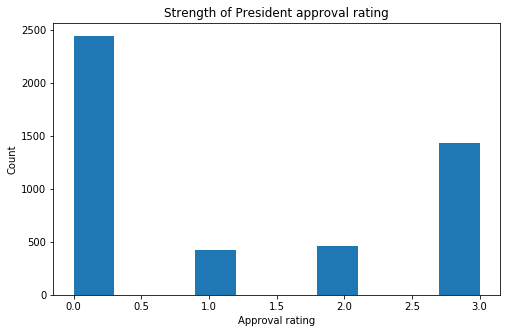

In [62]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df3['Donald Trump Approval'])

df3['Donald Trump Approval'].plot(kind='hist', figsize=(8, 5))

plt.title('Strength of President approval rating') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Approval rating') # add x-label

plt.show()

In [63]:
df3.columns

Index(['Satisfied With Country', 'Vote in election', 'Donald Trump Approval',
       'Income Tier', 'Employment', 'Community type', 'Political Area',
       'COVID impact on finances', 'Worried about Debt',
       'Worried about losing Job', 'Worried about Paying Bills',
       'Worried about Healthcare Costs', 'Worried about Cut in Pay'],
      dtype='object')

In [64]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

In [65]:
#To set up K means parameters
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 50)

In [66]:
df3.dropna(subset=['Employment'])
df3['Employment'].value_counts()

Full-time       2349
Not employed    1672
Part-time        734
Refused           10
Name: Employment, dtype: int64

In [67]:
#I am only interested in employed individuals so I am dropping all of the other subgroups
df3['Employment'] = df3.loc[df3['Employment'] == 'Full-time']
df3.head()

,Satisfied With Country,Vote in election,Donald Trump Approval,Income Tier,Employment,Community type,Political Area,COVID impact on finances,Worried about Debt,Worried about losing Job,Worried about Paying Bills,Worried about Healthcare Costs,Worried about Cut in Pay
0,Dissatisfied,Refused,0,Middle income,NaN,Urban,lean/likely D,Impacted my finances about the same as it has ...,Sometimes,NaN,Sometimes,Sometimes,NaN
1,Satisfied,"Donald Trump, the Republican",3,Middle income,NaN,Suburban,Solid D,Hurt my finances LESS than those of most other...,Rarely,Rarely,Rarely,Rarely,Rarely
2,Satisfied,"Donald Trump, the Republican",3,Middle income,NaN,Rural,battleground,Impacted my finances about the same as it has ...,Sometimes,NaN,Sometimes,Sometimes,NaN
3,Dissatisfied,"Joe Biden, the Democrat",2,Upper income,NaN,Suburban,Solid D,Hurt my finances LESS than those of most other...,Sometimes,NaN,Sometimes,Almost every day,NaN
4,Satisfied,"Donald Trump, the Republican",3,Lower income,NaN,Rural,Solid R,Impacted my finances about the same as it has ...,Never,NaN,Never,Never,NaN


In [68]:
df3['Employment'] = df2['F_E3']
df3['Employment'].value_counts()

Full-time       2349
Not employed    1672
Part-time        734
Refused           10
Name: Employment, dtype: int64

In [69]:
df3.loc[df3['Employment'] == 'Full-time']

,Satisfied With Country,Vote in election,Donald Trump Approval,Income Tier,Employment,Community type,Political Area,COVID impact on finances,Worried about Debt,Worried about losing Job,Worried about Paying Bills,Worried about Healthcare Costs,Worried about Cut in Pay
6,Dissatisfied,"Joe Biden, the Democrat",0,Upper income,Full-time,Urban,lean/likely R,Impacted my finances about the same as it has ...,Sometimes,Sometimes,Sometimes,Almost every day,Rarely
9,Dissatisfied,"Joe Biden, the Democrat",0,Upper income,Full-time,Suburban,Solid D,Impacted my finances about the same as it has ...,Rarely,Rarely,Never,Sometimes,Never
10,Dissatisfied,"Joe Biden, the Democrat",0,Upper income,Full-time,Rural,lean/likely D,Hurt my finances LESS than those of most other...,Rarely,Rarely,Sometimes,Sometimes,Rarely
15,Satisfied,"Donald Trump, the Republican",3,Upper income,Full-time,Rural,battleground,Impacted my finances about the same as it has ...,Almost every day,Rarely,Sometimes,Almost every day,Rarely
16,Satisfied,"Donald Trump, the Republican",3,Upper income,Full-time,Suburban,battleground,Impacted my finances about the same as it has ...,Never,NaN,Never,Rarely,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,Satisfied,"Donald Trump, the Republican",2,Upper income,Full-time,Urban,battleground,Hurt my finances LESS than those of most other...,Never,Never,Never,Rarely,Sometimes
4906,Dissatisfied,NaN,0,Middle income,Full-time,Suburban,Solid D,Hurt my finances LESS than those of most other...,Almost every day,Almost every day,Every day,Every day,Sometimes
4907,Satisfied,"Joe Biden, the Democrat",1,Middle income,Full-time,Suburban,battleground,Hurt my finances LESS than those of most other...,Rarely,Never,Never,Never,Never
4908,Dissatisfied,NaN,0,Lower income,Full-time,Urban,Solid D,Hurt my finances MORE than those of most other...,Sometimes,NaN,Every day,Sometimes,NaN


In [70]:
df3['Employment'].value_counts()

Full-time       2349
Not employed    1672
Part-time        734
Refused           10
Name: Employment, dtype: int64

In [71]:
df5 = df3.loc[df3['Employment'] == 'Full-time']
df5['Employment'].value_counts()

Full-time       2349
Refused            0
Part-time          0
Not employed       0
Name: Employment, dtype: int64

In [72]:
df5.shape

(2349, 13)

In [73]:
df5.columns

Index(['Satisfied With Country', 'Vote in election', 'Donald Trump Approval',
       'Income Tier', 'Employment', 'Community type', 'Political Area',
       'COVID impact on finances', 'Worried about Debt',
       'Worried about losing Job', 'Worried about Paying Bills',
       'Worried about Healthcare Costs', 'Worried about Cut in Pay'],
      dtype='object')

In [74]:
clus_df = df5[['Community type', 'Donald Trump Approval', 'Income Tier']]
clus_df.head()

,Community type,Donald Trump Approval,Income Tier
6,Urban,0,Upper income
9,Suburban,0,Upper income
10,Rural,0,Upper income
15,Rural,3,Upper income
16,Suburban,3,Upper income


C:\Users\lance\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lance\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    1235
2     670
0     444
Name: Community type, dtype: int64

In [78]:
df3['Income Tier'] = df3['Income Tier'].replace(['Lower Income', 'Middle Income', 'Upper Income', 'Refused'], ['1','2','3','NaN'])
df3['Income Tier'].value_counts()

Middle income    2130
Upper income     1571
Lower income      867
NaN               197
Name: Income Tier, dtype: int64

In [83]:
df3['Income Tier'] = df3['Income Tier'].replace(['Lower income', 'Middle income', 'Upper income'], ['1','2','3'])
df3['Income Tier'].value_counts()

2      2130
3      1571
1       867
NaN     197
Name: Income Tier, dtype: int64

In [84]:
income_ind = df3[(df3['Income Tier'] == 'NaN')].index
df3.drop(income_ind, inplace = True)
df3['Income Tier'].value_counts()

2    2130
3    1571
1     867
Name: Income Tier, dtype: int64

In [88]:
df3['Income Tier'].value_counts()

2    2130
3    1571
1     867
Name: Income Tier, dtype: int64

In [94]:
df4 = df3[['Income Tier', 'Donald Trump Approval','Community type']]
df4.head()

,Income Tier,Donald Trump Approval,Community type
0,2,0,Urban
1,2,3,Suburban
2,2,3,Rural
3,3,2,Suburban
4,1,3,Rural


In [92]:
df4['Community type'].value_counts()

Suburban    2329
Urban       1193
Rural       1037
Refused        9
Name: Community type, dtype: int64

In [93]:
comm_ind = df4[(df4['Community type'] == 'Refused')].index
df4.drop(comm_ind, inplace = True)
df4['Community type'].value_counts()

C:\Users\lance\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Suburban    2329
Urban       1193
Rural       1037
Refused        0
Name: Community type, dtype: int64

In [96]:
df4['Community type'] = df4['Community type'].replace(['Rural', 'Suburban', 'Urban'], ['1','2','3'])
df4['Community type'].value_counts()

C:\Users\lance\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2          2329
3          1193
1          1037
Refused       9
Name: Community type, dtype: int64

In [98]:
comm_ind = df4[(df4['Community type'] == 'Refused')].index
df4.drop(comm_ind, inplace = True)
df4['Community type'].value_counts()

C:\Users\lance\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


2    2329
3    1193
1    1037
Name: Community type, dtype: int64

In [99]:
df4['Community type'].value_counts()

2    2329
3    1193
1    1037
Name: Community type, dtype: int64

In [100]:
df4.dtypes

Income Tier              object
Donald Trump Approval     int32
Community type           object
dtype: object

In [101]:
df4['Income Tier'] = df4['Income Tier'].astype(str).astype(int)
df4['Community type'] = df4['Community type'].astype(str).astype(int)


df4.dtypes

C:\Users\lance\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lance\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Income Tier              int32
Donald Trump Approval    int32
Community type           int32
dtype: object

In [102]:
from sklearn.preprocessing import StandardScaler
X = df4.values[:,1:]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.88442085,  1.38255327],
       [ 1.36562081, -0.0489844 ],
       [ 1.36562081, -1.48052206],
       ...,
       [-0.88442085, -0.0489844 ],
       [-0.13440696,  1.38255327],
       [ 0.61560692,  1.38255327]])

In [110]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 100)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 1 1 ... 0 2 1]


In [111]:
df4["Clus_km"] = labels
df4.head(5)

C:\Users\lance\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Income Tier,Donald Trump Approval,Community type,Clus_km
0,2,0,3,2
1,2,3,2,1
2,2,3,1,1
3,3,2,2,1
4,1,3,1,1


In [112]:
df4.groupby('Clus_km').mean()

,Income Tier,Donald Trump Approval,Community type
Clus_km,,,
0,2.198612,0.151095,1.751201
1,2.140642,2.755260,1.857143
2,2.092045,0.132955,3.000000


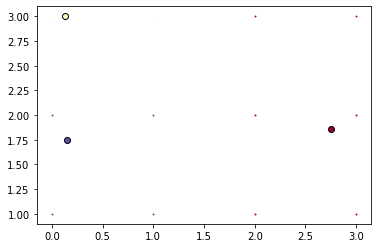

In [113]:
# write your code here
k_means_2 = KMeans(init = "k-means++", n_clusters = 3, n_init = 50)
k_means_2.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_2.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means_2.cluster_centers_)), colors):
    my_members = (k_means_2.labels_ == k)
    cluster_center = k_means_2.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


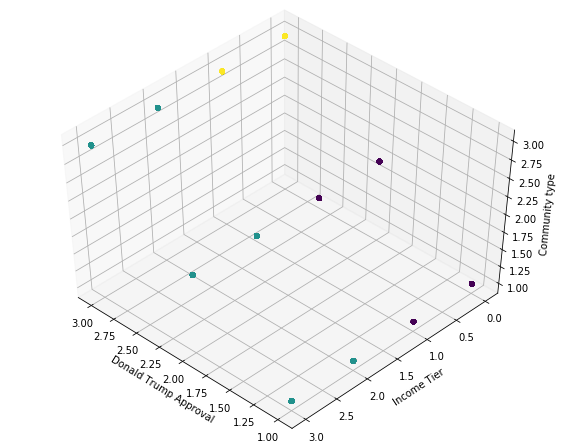

In [114]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Donald Trump Approval')
ax.set_ylabel('Income Tier')
ax.set_zlabel('Community type')

ax.scatter(X[:, 1], X[:, 0], X[:, 1], c= labels.astype(np.float))


None of the above visualizations tell us much. Furthermore, it seems from the clustering that there is not an easily apparent relationship between political alignment and income or community type

### Conclusion - That my hypothesis that there might be certain relationships between presidential approval and income status or community type are not immediately apparent through my analysis